Objectives:  Use Permutation Importance to identify building features that influence heating/cooling loads.  Apply SHAP for global and local interpretations.  Use LIME to generate explanations for two buildings.  Compare and contrast across PI, SHAP, and LIME. Assignment Details:  Goal: Understand which architectural and material features drive building energy efficiency.  Data: UCI Energy Efficiency dataset.  Model: RandomForestRegressor Steps:  1. Train RandomForestRegressor.  2. Permutation Importance: Rank features such as surface area, wall area, roof area.  3. SHAP: Global summary plot + force plot for one building.  4. LIME: Explain predictions for two buildings with different energy demands.  5. Compare results across methods. Deliverables:  PI bar chart.  SHAP summary plot + local explanation.  LIME explanations for 2 buildings.  Comparative discussion. Submission Requirements:  Short methods summary (3–5 lines).  Clean, runnable code/notebook.  All required plots (PI, SHAP global + local, LIME local).  5–10 bullet insights highlighting consistencies and differences

R² Score: 0.9976716085106088


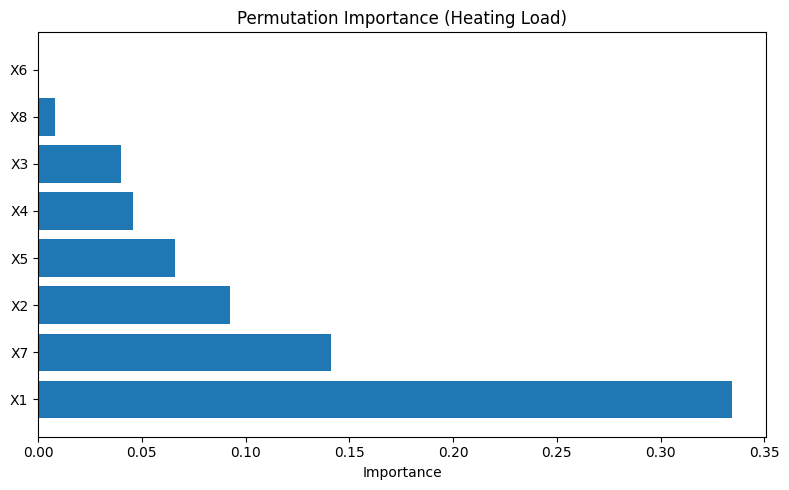

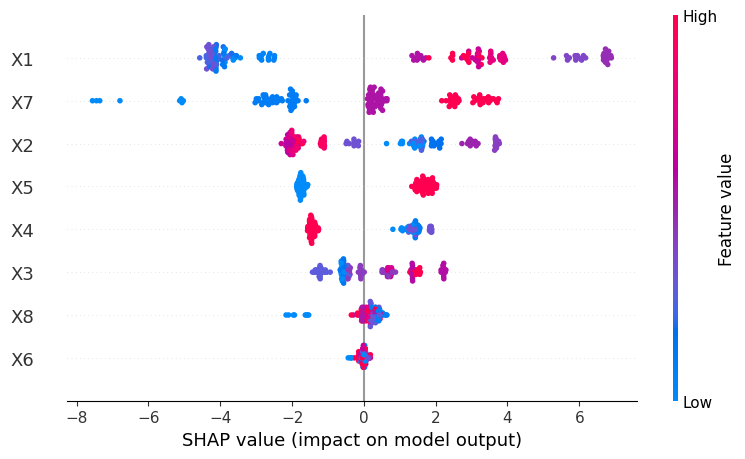

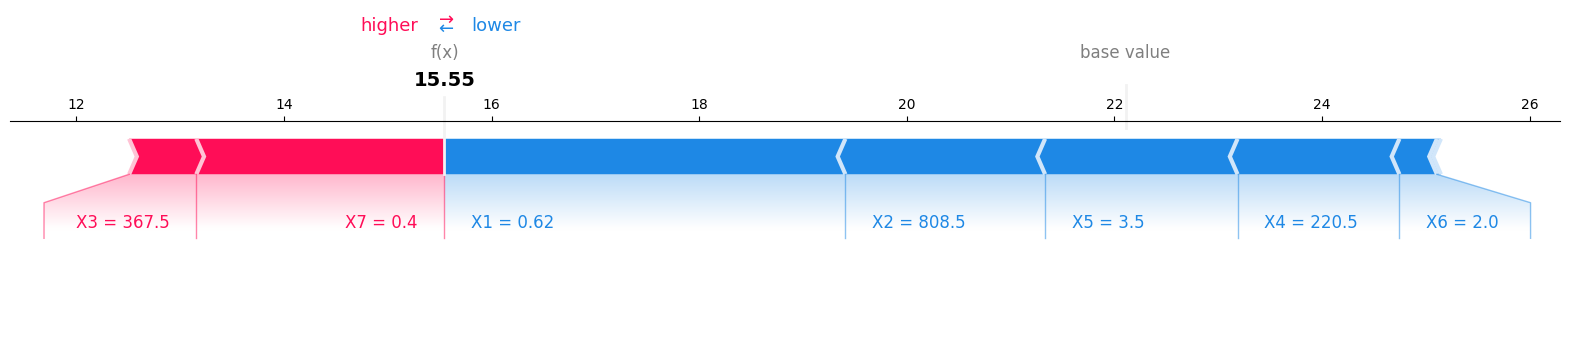

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


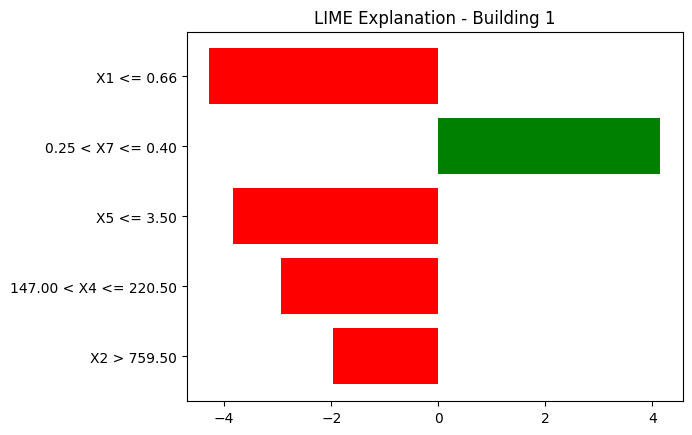

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


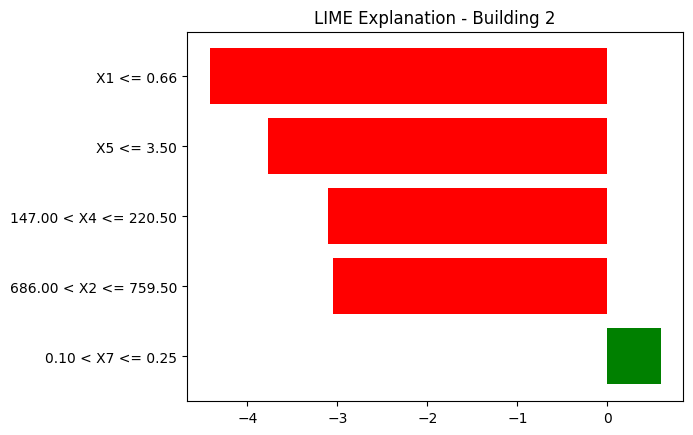

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import shap
import lime
import lime.lime_tabular


# 1. Load dataset

# Change filename if needed
df = pd.read_csv("/content/archive.zip")

# Features = first 8 columns, Target = Heating Load (Y1)
X = df.iloc[:, :8]
y = df["Y1"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 2. Train RandomForest

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))


# 3. Permutation Importance

perm = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
pi_results = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm.importances_mean
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(pi_results["Feature"], pi_results["Importance"])
plt.title("Permutation Importance (Heating Load)")
plt.xlabel("Importance")
plt.tight_layout()
plt.savefig("pi_plot.png")
plt.show()

# 4. SHAP Analysis

# Fix numpy bool issue (for latest numpy)
if not hasattr(np, "bool"):
    np.bool = bool

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Global summary
shap.summary_plot(shap_values, X_test, show=True)

# Local force plot for 1st building
shap.force_plot(
    explainer.expected_value,
    shap_values[0,:],
    X_test.iloc[0,:],
    matplotlib=True,
    show=True
)

# 5. LIME Explanations

lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X.columns,
    mode="regression"
)

# First building
exp1 = lime_explainer.explain_instance(
    X_test.iloc[0].values, model.predict, num_features=5
)
exp1.show_in_notebook(show_table=True)
fig1 = exp1.as_pyplot_figure()
plt.title("LIME Explanation - Building 1")
plt.show()

# Second building
exp2 = lime_explainer.explain_instance(
    X_test.iloc[1].values, model.predict, num_features=5
)
exp2.show_in_notebook(show_table=True)
fig2 = exp2.as_pyplot_figure()
plt.title("LIME Explanation - Building 2")
plt.show()


In [5]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=00a094d7a16358cb67411a98395826ac0f0b484532d7c6c430beff2a19f96292
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
